You are given an integer n, representing the number of employees in a company. Each employee is assigned a unique ID from 1 to n, and employee 1 is the CEO. You are given two 1-based integer arrays, present and future, each of length n, where:

    present[i] represents the current price at which the ith employee can buy a stock today.
    future[i] represents the expected price at which the ith employee can sell the stock tomorrow.

The company's hierarchy is represented by a 2D integer array hierarchy, where hierarchy[i] = [ui, vi] means that employee ui is the direct boss of employee vi.

Additionally, you have an integer budget representing the total funds available for investment.

However, the company has a discount policy: if an employee's direct boss purchases their own stock, then the employee can buy their stock at half the original price (floor(present[v] / 2)).

Return the maximum profit that can be achieved without exceeding the given budget.

Note:

    You may buy each stock at most once.
    You cannot use any profit earned from future stock prices to fund additional investments and must buy only from budget.

 

Example 1:

Input: n = 2, present = [1,2], future = [4,3], hierarchy = [[1,2]], budget = 3

Output: 5

Explanation:

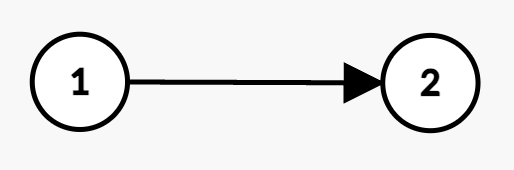

    Employee 1 buys the stock at price 1 and earns a profit of 4 - 1 = 3.
    Since Employee 1 is the direct boss of Employee 2, Employee 2 gets a discounted price of floor(2 / 2) = 1.
    Employee 2 buys the stock at price 1 and earns a profit of 3 - 1 = 2.
    The total buying cost is 1 + 1 = 2 <= budget. Thus, the maximum total profit achieved is 3 + 2 = 5.

Example 2:

Input: n = 2, present = [3,4], future = [5,8], hierarchy = [[1,2]], budget = 4

Output: 4

Explanation:

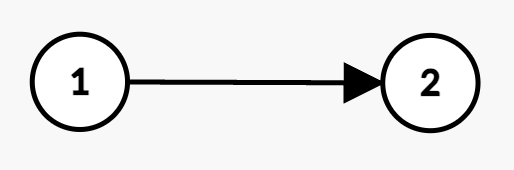

    Employee 2 buys the stock at price 4 and earns a profit of 8 - 4 = 4.
    Since both employees cannot buy together, the maximum profit is 4.

Example 3:

Input: n = 3, present = [4,6,8], future = [7,9,11], hierarchy = [[1,2],[1,3]], budget = 10

Output: 10

Explanation:

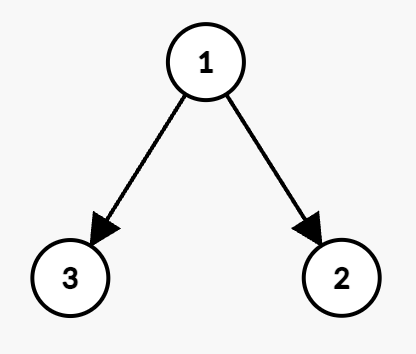

    Employee 1 buys the stock at price 4 and earns a profit of 7 - 4 = 3.
    Employee 3 would get a discounted price of floor(8 / 2) = 4 and earns a profit of 11 - 4 = 7.
    Employee 1 and Employee 3 buy their stocks at a total cost of 4 + 4 = 8 <= budget. Thus, the maximum total profit achieved is 3 + 7 = 10.

Example 4:

Input: n = 3, present = [5,2,3], future = [8,5,6], hierarchy = [[1,2],[2,3]], budget = 7

Output: 12

Explanation:

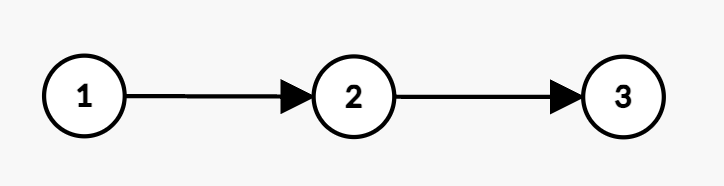

    Employee 1 buys the stock at price 5 and earns a profit of 8 - 5 = 3.
    Employee 2 would get a discounted price of floor(2 / 2) = 1 and earns a profit of 5 - 1 = 4.
    Employee 3 would get a discounted price of floor(3 / 2) = 1 and earns a profit of 6 - 1 = 5.
    The total cost becomes 5 + 1 + 1 = 7 <= budget. Thus, the maximum total profit achieved is 3 + 4 + 5 = 12.

 

Constraints:

    1 <= n <= 160
    present.length, future.length == n
    1 <= present[i], future[i] <= 50
    hierarchy.length == n - 1
    hierarchy[i] == [ui, vi]
    1 <= ui, vi <= n
    ui != vi
    1 <= budget <= 160
    There are no duplicate edges.
    Employee 1 is the direct or indirect boss of every employee.
    The input graph hierarchy is guaranteed to have no cycles.



In [ ]:
class Solution:
    def maxProfit(self, n: int, present: List[int], future: List[int], hierarchy: List[List[int]], budget: int) -> int:
        g = [[] for _ in range(n)]
        for e in hierarchy:
            g[e[0] - 1].append(e[1] - 1)

        def dfs(u: int):
            cost = present[u]
            dCost = present[u] // 2

            # dp[u][state][budget]
            # state = 0: Do not purchase parent node, state = 1: Must purchase parent node
            dp0 = [0] * (budget + 1)
            dp1 = [0] * (budget + 1)

            # subProfit[state][budget]
            # state = 0: discount not available, state = 1: discount available
            subProfit0 = [0] * (budget + 1)
            subProfit1 = [0] * (budget + 1)
            uSize = cost

            for v in g[u]:
                child_dp0, child_dp1, vSize = dfs(v)
                uSize += vSize
                for i in range(budget, -1, -1):
                    for sub in range(min(vSize, i) + 1):
                        if i - sub >= 0:
                            subProfit0[i] = max(
                                subProfit0[i],
                                subProfit0[i - sub] + child_dp0[sub],
                            )
                            subProfit1[i] = max(
                                subProfit1[i],
                                subProfit1[i - sub] + child_dp1[sub],
                            )

            for i in range(budget + 1):
                dp0[i] = subProfit0[i]
                dp1[i] = subProfit0[i]
                if i >= dCost:
                    dp1[i] = max(
                        subProfit0[i], subProfit1[i - dCost] + future[u] - dCost
                    )
                if i >= cost:
                    dp0[i] = max(
                        subProfit0[i], subProfit1[i - cost] + future[u] - cost
                    )

            return dp0, dp1, uSize

        return dfs(0)[0][budget]